In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings(action = "ignore")
from scipy.stats import f_oneway, chi2_contingency

### Credit Card default data (Classification):

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/credit_card_default_data.csv')
df1.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
# Rename columns based on the values in the first row of the DataFrame
df1 = df1.rename(columns={
    'X1': df1.loc[0, 'X1'],
    'X2': df1.loc[0, 'X2'],
    'X3': df1.loc[0, 'X3'],
    'X4': df1.loc[0, 'X4'],
    'X5': df1.loc[0, 'X5']
})

# Remove the first row (index 0) from the DataFrame, drop 'Unnamed: 0' column, and reset the index
df1 = df1.iloc[1:].drop('Unnamed: 0', axis=1).reset_index(drop=True)
df1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
columns_with_null = df1.columns[df1.isnull().any()]
print("Columns with null values:")
for col in columns_with_null:
    print(col)

Columns with null values:


In [ ]:
print(df1.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

# Extract the target variable 'Y'
y = df1['Y']

# Prepare the features 'X' for PCA
X = df1.drop(columns=['Y'])  # Remove the target variable from 'X'

# Specify the numeric columns to be scaled
numeric_cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']

# Convert the specified columns to numeric data types
X[numeric_cols] = X[numeric_cols].apply(pd.to_numeric)

# Standard scaling for numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=6)  # Choose the number of components (6 in this case)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Function for evaluation
def evaluate(model, model_name, x_train=x_train, y_train=y_train, x_test=x_test):
    print(f"Model performance for {model_name}")
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)
    plt.title('Confusion Matrix')
    plt.show()

    # Precision score
    precision_score_train = precision_score(y_train, y_train_pred, pos_label='1')
    precision_score_test = precision_score(y_test, y_test_pred, pos_label='1')
    precision_score_macro_train = precision_score(y_train, y_train_pred, average='macro')
    precision_score_macro_test = precision_score(y_test, y_test_pred, average='macro')

    # Recall score
    recall_score_train = recall_score(y_train, y_train_pred, pos_label='1')
    recall_score_test = recall_score(y_test, y_test_pred, pos_label='1')
    recall_score_macro_train = recall_score(y_train, y_train_pred, average='macro')
    recall_score_macro_test = recall_score(y_test, y_test_pred, average='macro')

    # F1 score
    f1_score_train = f1_score(y_train, y_train_pred, pos_label='1')
    f1_score_test = f1_score(y_test, y_test_pred, pos_label='1')
    f1_score_macro_train = f1_score(y_train, y_train_pred, average='macro')
    f1_score_macro_test = f1_score(y_test, y_test_pred, average='macro')

    # Accuracy score
    accuracy_score_train = accuracy_score(y_train, y_train_pred)
    accuracy_score_test = accuracy_score(y_test, y_test_pred)

    print("Precision Score Train:", precision_score_train)
    print("Precision Score Test:", precision_score_test)
    print("Precision Score (Macro) Train:", precision_score_macro_train)
    print("Precision Score (Macro) Test:", precision_score_macro_test)

    print("Recall Score Train:", recall_score_train)
    print("Recall Score Test:", recall_score_test)
    print("Recall Score (Macro) Train:", recall_score_macro_train)
    print("Recall Score (Macro) Test:", recall_score_macro_test)

    print("F1 Score Train:", f1_score_train)
    print("F1 Score Test:", f1_score_test)
    print("F1 Score (Macro) Train:", f1_score_macro_train)
    print("F1 Score (Macro) Test:", f1_score_macro_test)

    print("Accuracy Score Train:", accuracy_score_train)
    print("Accuracy Score Test:", accuracy_score_test)

    return (
        precision_score_train, precision_score_test, precision_score_macro_train, precision_score_macro_test,
        recall_score_train, recall_score_test, recall_score_macro_train, recall_score_macro_test,
        f1_score_train, f1_score_test, f1_score_macro_train, f1_score_macro_test,
        accuracy_score_train, accuracy_score_test
    )


Model performance for Logistic Regression


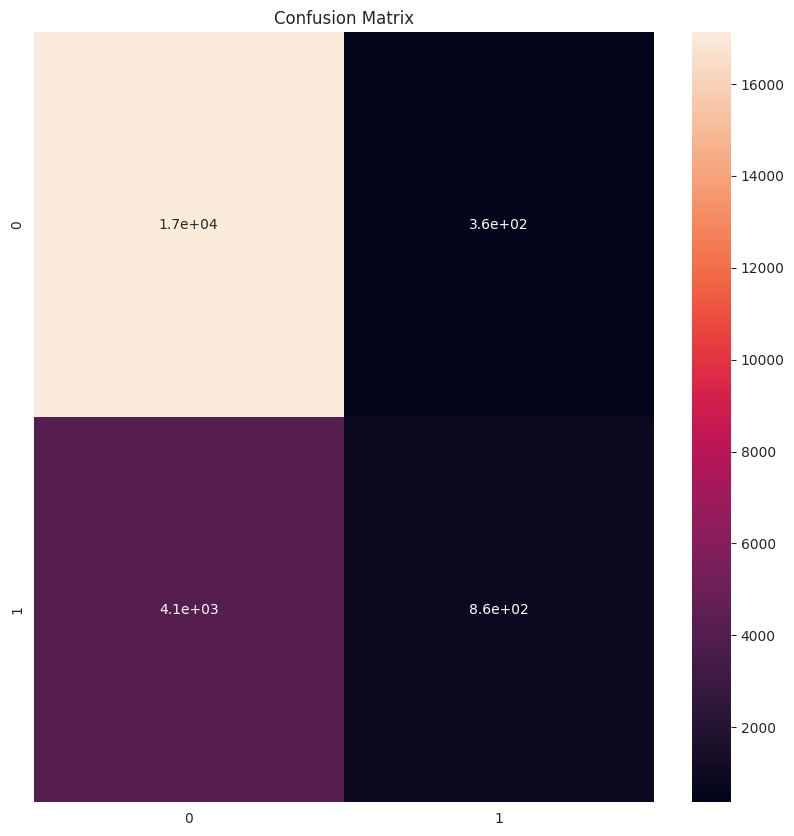

Precision Score Train: 0.7025264873675632
Precision Score Test: 0.6361323155216285
Precision Score (Macro) Train: 0.7537922710894132
Precision Score (Macro) Test: 0.7211898386388218
Recall Score Train: 0.17209023757236974
Recall Score Test: 0.15365703749231716
Recall Score (Macro) Train: 0.5756111813326373
Recall Score (Macro) Test: 0.564654161518166
F1 Score Train: 0.2764592687620269
F1 Score Test: 0.24752475247524752
F1 Score (Macro) Train: 0.5800313060351255
F1 Score (Macro) Test: 0.565210758363972
Accuracy Score Train: 0.7994666666666667
Accuracy Score Test: 0.7973333333333333


In [ ]:
# Implementing Logistic Regression using Scikit-learn
clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
LR = evaluate(clf1, 'Logistic Regression')

ANN Model 1

Epoch 1/50
563/563 - 5s - loss: 0.4775 - accuracy: 0.8001 - val_loss: 0.4664 - val_accuracy: 0.8038 - 5s/epoch - 8ms/step
Epoch 2/50
563/563 - 2s - loss: 0.4553 - accuracy: 0.8072 - val_loss: 0.4634 - val_accuracy: 0.8038 - 2s/epoch - 3ms/step
Epoch 3/50
563/563 - 1s - loss: 0.4525 - accuracy: 0.8078 - val_loss: 0.4550 - val_accuracy: 0.8033 - 1s/epoch - 2ms/step
Epoch 4/50
563/563 - 1s - loss: 0.4492 - accuracy: 0.8084 - val_loss: 0.4592 - val_accuracy: 0.8060 - 1s/epoch - 2ms/step
Epoch 5/50
563/563 - 1s - loss: 0.4490 - accuracy: 0.8083 - val_loss: 0.4594 - val_accuracy: 0.8062 - 1s/epoch - 2ms/step
Epoch 6/50
563/563 - 2s - loss: 0.4465 - accuracy: 0.8094 - val_loss: 0.4530 - val_accuracy: 0.8064 - 2s/epoch - 3ms/step
Epoch 7/50
563/563 - 2s - loss: 0.4459 - accuracy: 0.8079 - val_loss: 0.4530 - val_accuracy: 0.8062 - 2s/epoch - 3ms/step
Epoch 8/50
563/563 - 1s - loss: 0.4443 - accuracy: 0.8093 - val_loss: 0.4560 - val_accuracy: 0.8067 - 1s/epoch - 2ms/step
Epoch 9/50
563/563 - 1s 

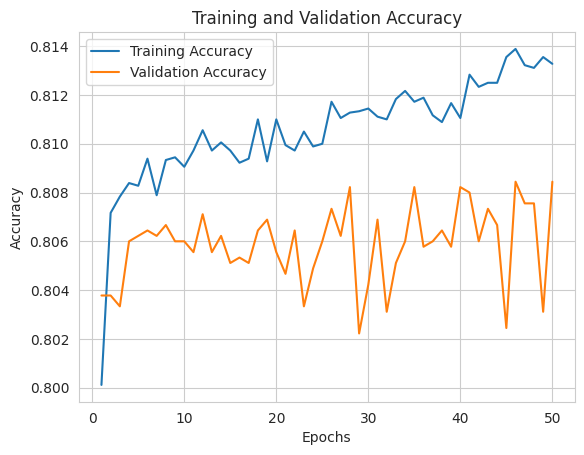

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Convert labels to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Plot training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train and test data
train_predictions = (model.predict(x_train) > 0.5).astype(int)
test_predictions = (model.predict(x_test) > 0.5).astype(int)

# Calculate classification metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)
train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)
confusion_train = confusion_matrix(y_train, train_predictions)
confusion_test = confusion_matrix(y_test, test_predictions)

# Print the classification results
print("Train Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print("Confusion Matrix (Train):")
print(confusion_train)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print("Confusion Matrix (Test):")
print(confusion_test)

235/235 [==============================] - 1s 2ms/step
Train Metrics:
Accuracy: 0.8137777777777778
Precision: 0.6417445482866043
Recall: 0.37013375923337993
F1 Score: 0.4694859458090656
Confusion Matrix (Train):
[[16456  1035]
 [ 3155  1854]]

Test Metrics:
Accuracy: 0.8045333333333333
Precision: 0.5835929387331257
Recall: 0.345421020282729
F1 Score: 0.43397683397683406
Confusion Matrix (Test):
[[5472  401]
 [1065  562]]


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, train_predictions))

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, test_predictions))

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     17491
           1       0.64      0.37      0.47      5009

    accuracy                           0.81     22500
   macro avg       0.74      0.66      0.68     22500
weighted avg       0.80      0.81      0.79     22500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      5873
           1       0.58      0.35      0.43      1627

    accuracy                           0.80      7500
   macro avg       0.71      0.64      0.66      7500
weighted avg       0.78      0.80      0.78      7500



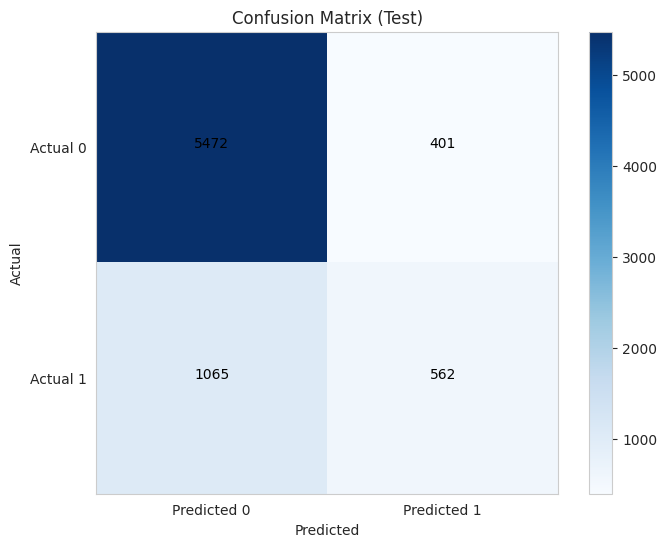

In [ ]:
# Plot the confusion matrix for the test data
plt.figure(figsize=(8, 6))
plt.imshow(confusion_test, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix (Test)")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{confusion_test[i, j]}", horizontalalignment="center", color="black")
plt.grid(False)  # Remove gridlines
plt.show()


ANN Model 2

Epoch 1/25
563/563 - 4s - loss: 0.5086 - accuracy: 0.7720 - val_loss: 0.4649 - val_accuracy: 0.8018 - 4s/epoch - 6ms/step
Epoch 2/25
563/563 - 1s - loss: 0.4596 - accuracy: 0.8061 - val_loss: 0.4573 - val_accuracy: 0.8033 - 1s/epoch - 3ms/step
Epoch 3/25
563/563 - 1s - loss: 0.4562 - accuracy: 0.8074 - val_loss: 0.4546 - val_accuracy: 0.8044 - 1s/epoch - 3ms/step
Epoch 4/25
563/563 - 2s - loss: 0.4534 - accuracy: 0.8084 - val_loss: 0.4539 - val_accuracy: 0.8060 - 2s/epoch - 4ms/step
Epoch 5/25
563/563 - 2s - loss: 0.4524 - accuracy: 0.8083 - val_loss: 0.4523 - val_accuracy: 0.8062 - 2s/epoch - 4ms/step
Epoch 6/25
563/563 - 2s - loss: 0.4511 - accuracy: 0.8071 - val_loss: 0.4579 - val_accuracy: 0.8049 - 2s/epoch - 3ms/step
Epoch 7/25
563/563 - 2s - loss: 0.4496 - accuracy: 0.8071 - val_loss: 0.4498 - val_accuracy: 0.8056 - 2s/epoch - 3ms/step
Epoch 8/25
563/563 - 2s - loss: 0.4495 - accuracy: 0.8071 - val_loss: 0.4545 - val_accuracy: 0.8076 - 2s/epoch - 3ms/step
Epoch 9/25
563/563 - 2s 

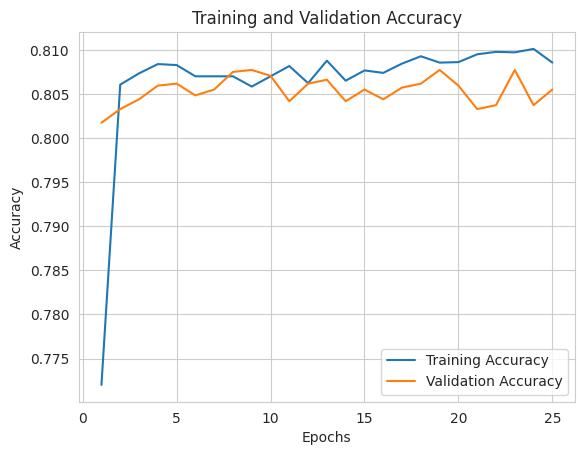

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Convert labels to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())  # Batch normalization layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=2)

# Plot training and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train and test data
train_predictions = (model.predict(x_train) > 0.5).astype(int)
test_predictions = (model.predict(x_test) > 0.5).astype(int)

# Calculate classification metrics
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)
train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)
confusion_train = confusion_matrix(y_train, train_predictions)
confusion_test = confusion_matrix(y_test, test_predictions)

# Print the classification results
print("Train Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print("Confusion Matrix (Train):")
print(confusion_train)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print("Confusion Matrix (Test):")
print(confusion_test)

235/235 [==============================] - 0s 1ms/step
Train Metrics:
Accuracy: 0.8104888888888889
Precision: 0.6424474187380497
Recall: 0.33539628668396887
F1 Score: 0.440713536201469
Confusion Matrix (Train):
[[16556   935]
 [ 3329  1680]]

Test Metrics:
Accuracy: 0.8052
Precision: 0.5976470588235294
Recall: 0.31223110018438843
F1 Score: 0.41017359709325796
Confusion Matrix (Test):
[[5531  342]
 [1119  508]]


In [ ]:
from sklearn.metrics import classification_report

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, train_predictions))

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, test_predictions))

Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     17491
           1       0.64      0.34      0.44      5009

    accuracy                           0.81     22500
   macro avg       0.74      0.64      0.66     22500
weighted avg       0.79      0.81      0.79     22500

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5873
           1       0.60      0.31      0.41      1627

    accuracy                           0.81      7500
   macro avg       0.71      0.63      0.65      7500
weighted avg       0.78      0.81      0.78      7500



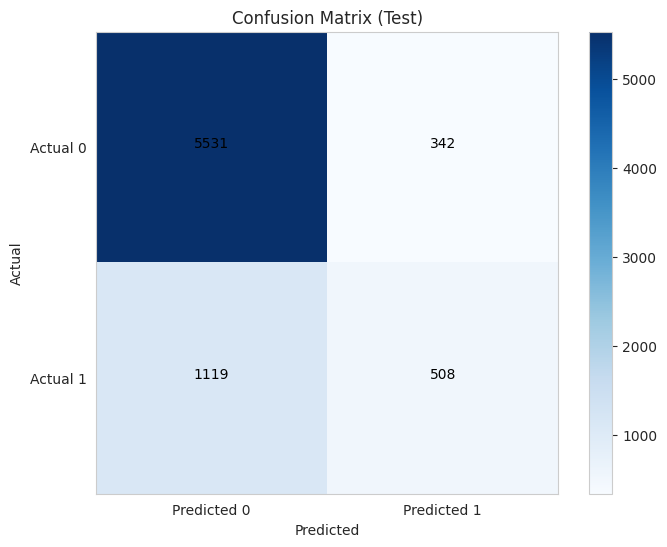

In [ ]:
# Plot the confusion matrix for the test data
plt.figure(figsize=(8, 6))
plt.imshow(confusion_test, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix (Test)")
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{confusion_test[i, j]}", horizontalalignment="center", color="black")
plt.grid(False)  # Remove gridlines
plt.show()


Results :

Logistic Regression

Precision Score Train: 0.7025264873675632
Precision Score Test: 0.6361323155216285
Precision Score (Macro) Train: 0.7537922710894132
Precision Score (Macro) Test: 0.7211898386388218
Recall Score Train: 0.17209023757236974
Recall Score Test: 0.15365703749231716
Recall Score (Macro) Train: 0.5756111813326373
Recall Score (Macro) Test: 0.564654161518166
F1 Score Train: 0.2764592687620269
F1 Score Test: 0.24752475247524752
F1 Score (Macro) Train: 0.5800313060351255
F1 Score (Macro) Test: 0.565210758363972
Accuracy Score Train: 0.7994666666666667
Accuracy Score Test: 0.7973333333333333

ANN Model 1 :

Train Metrics:

Accuracy: 0.8137777777777778
Precision: 0.6417445482866043
Recall: 0.37013375923337993
F1 Score: 0.4694859458090656
Macro Averages (Precision,Recall,F1) -> (0.74,0.66,0.68)

Test Metrics:

Accuracy: 0.8045333333333333
Precision: 0.5835929387331257
Recall: 0.345421020282729
F1 Score: 0.43397683397683406
Macro Averages (Precision,Recall,F1) -> (0.71,0.64,0.66)

ANN Model 2 :

Train Metrics :

Accuracy: 0.8104888888888889
Precision: 0.6424474187380497
Recall: 0.33539628668396887
F1 Score: 0.440713536201469
Macro Averages (Precision,Recall,F1) -> (0.74,0.64,0.66)

Test Metrics:

Accuracy: 0.8052
Precision: 0.5976470588235294
Recall: 0.31223110018438843
F1 Score: 0.41017359709325796
Macro Averages (Precision,Recall,F1) ->(0.71,0.63,0.65)

Conclusion : Among the models, ANN Model 2 performs slightly better in terms of accuracy, precision, recall, and F1 score on both the training and testing data when compared to ANN Model 1. Logistic Regression has lower accuracy, precision, recall, and F1 score than both ANN models on both training and testing data. These results suggest that the ANN models are better suited for the task, likely due to their capacity to learn complex patterns and relationships in the data.


## Online News Popularity data (Regression):

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Online_news_popularity_data.csv')
df2.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
print(df2.isnull().sum())

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [ ]:
columns_with_null = df2.columns[df2.isnull().any()]
print("Columns with null values:")
for col in columns_with_null:
    print(col)

Columns with null values:


In [ ]:
categorical_cols = df2.select_dtypes(include=['object']).columns

print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
url


In [ ]:
df2 = df2.drop(columns=['url'])

In [ ]:
df2.head(5)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
#Preprocessing
# Remove leading and trailing whitespace from column names
df2.columns = df2.columns.str.strip()

# Separate features and target variable
X = df2.drop(columns=['shares'])
y = df2['shares']

# Selecting top correlated features with 'shares'
correlation_matrix = X.corrwith(y)
top_correlated_cols = correlation_matrix.abs().sort_values(ascending=False).index[:6]
X = X[top_correlated_cols]

# Standard scaling for numeric features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Standard scaling for the target variable
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

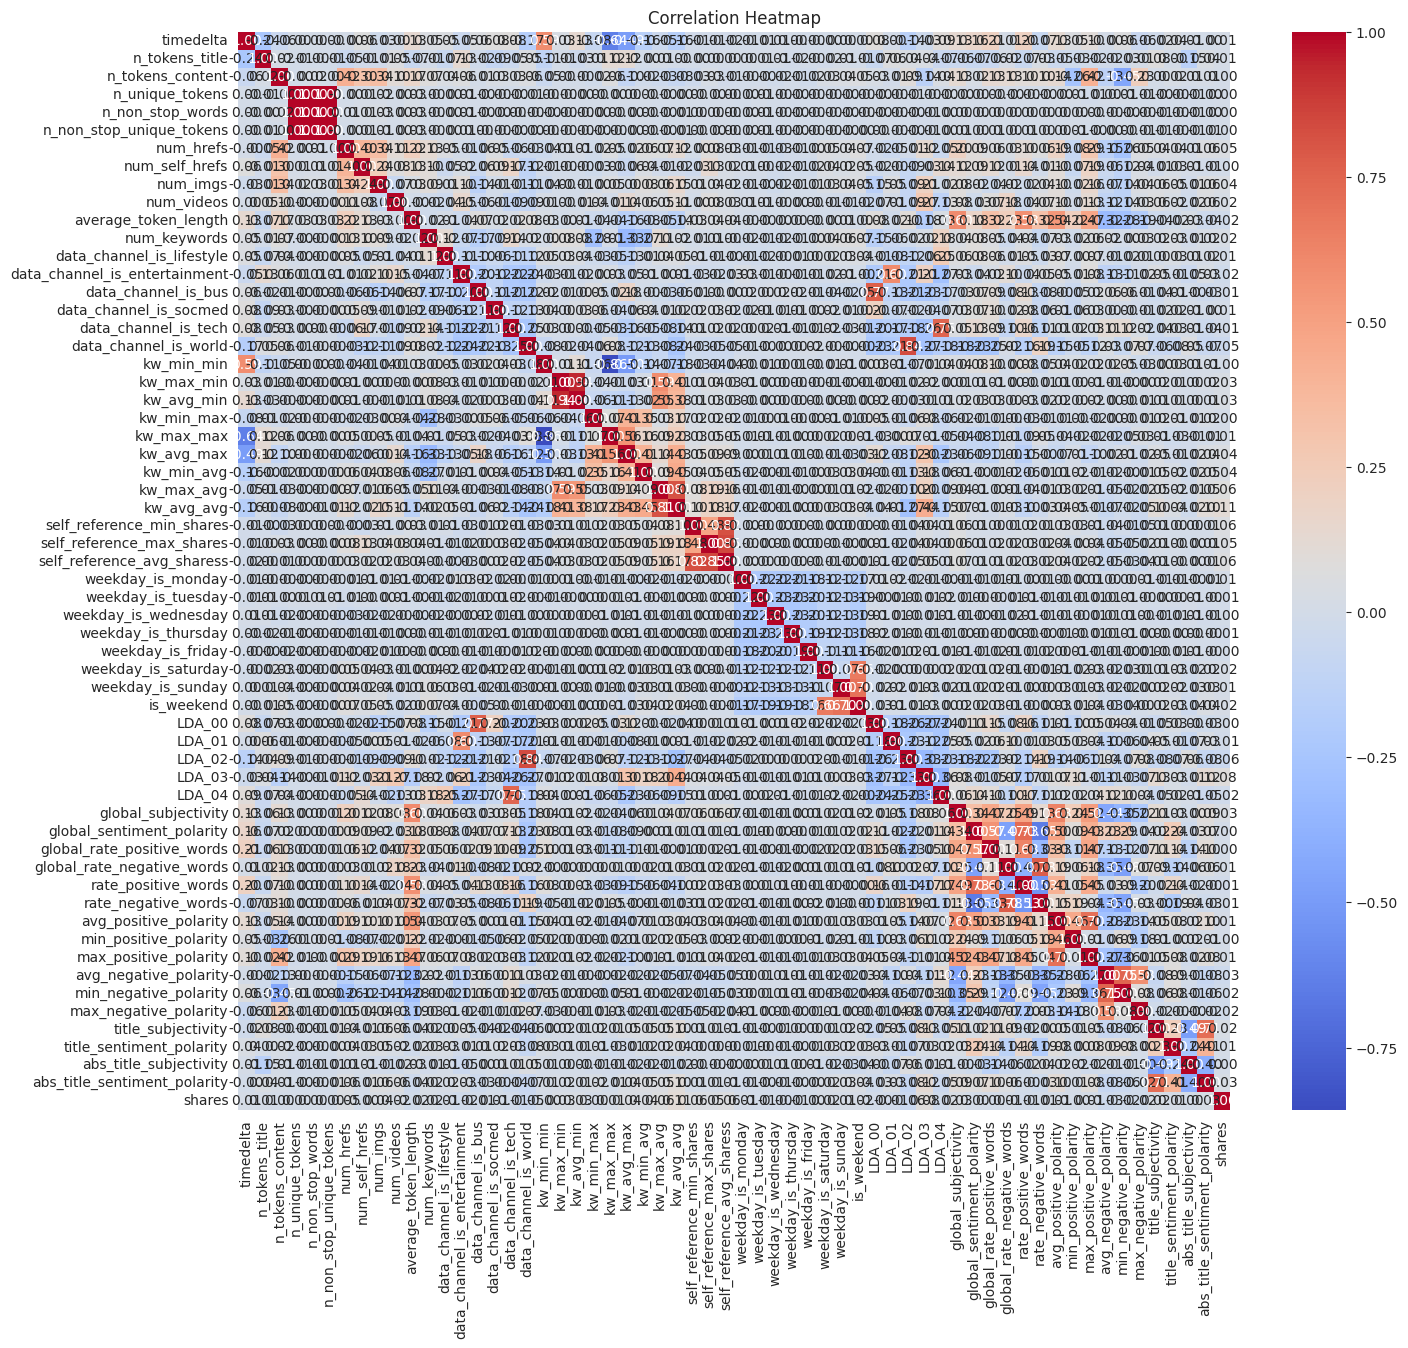

In [ ]:
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Set a larger figure size and annotation font size
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()


Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred_linear_train = model1.predict(x_train)
y_pred_linear_test = model1.predict(x_test)

mse_train_linear = mean_squared_error(y_train, y_pred_linear_train)
mse_test_linear = mean_squared_error(y_test, y_pred_linear_test)
rmse_train_linear = mean_squared_error(y_train, y_pred_linear_train, squared=False)  # RMSE
rmse_test_linear = mean_squared_error(y_test, y_pred_linear_test, squared=False)  # RMSE
mae_train_linear = mean_absolute_error(y_train, y_pred_linear_train)  # MAE
mae_test_linear = mean_absolute_error(y_test, y_pred_linear_test)  # MAE
r2_train_linear = r2_score(y_train, y_pred_linear_train)
r2_test_linear = r2_score(y_test, y_pred_linear_test)

print("Linear Regression:")
print(f"Train MSE: {mse_train_linear}, RMSE: {rmse_train_linear}, MAE: {mae_train_linear}, R2 Score: {r2_train_linear}")
print(f"Test MSE: {mse_test_linear}, RMSE: {rmse_test_linear}, MAE: {mae_test_linear}, R2 Score: {r2_test_linear}")


Linear Regression:
Train MSE: 1.0302132119147664, RMSE: 1.01499419304485, MAE: 0.267847411440932, R2 Score: 0.014985430254831233
Test MSE: 0.8409936318515154, RMSE: 0.9170570493985177, MAE: 0.26228087243391607, R2 Score: 0.024737039138365224


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model2 = LinearRegression()
model2.fit(x_train_poly, y_train)
y_pred_poly_train = model2.predict(x_train_poly)
y_pred_poly_test = model2.predict(x_test_poly)

mse_train_poly = mean_squared_error(y_train, y_pred_poly_train)
mse_test_poly = mean_squared_error(y_test, y_pred_poly_test)
rmse_train_poly = mean_squared_error(y_train, y_pred_poly_train, squared=False)  # RMSE
rmse_test_poly = mean_squared_error(y_test, y_pred_poly_test, squared=False)  # RMSE
mae_train_poly = mean_absolute_error(y_train, y_pred_poly_train)  # MAE
mae_test_poly = mean_absolute_error(y_test, y_pred_poly_test)  # MAE
r2_train_poly = r2_score(y_train, y_pred_poly_train)
r2_test_poly = r2_score(y_test, y_pred_poly_test)

print("Polynomial Regression:")
print(f"Train MSE: {mse_train_poly}, RMSE: {rmse_train_poly}, MAE: {mae_train_poly}, R2 Score: {r2_train_poly}")
print(f"Test MSE: {mse_test_poly}, RMSE: {rmse_test_poly}, MAE: {mae_test_poly}, R2 Score: {r2_test_poly}")

Polynomial Regression:
Train MSE: 1.0245418287246955, RMSE: 1.0121965366097117, MAE: 0.2660697359448069, R2 Score: 0.020407992311130885
Test MSE: 0.8480795990135551, RMSE: 0.9209123731460855, MAE: 0.2643612876094834, R2 Score: 0.016519757754432818


ANN Model 1

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                448       
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 16)                528       
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
744/744 - 4s - loss: 1.1742 - mean_squared_error: 1.1742 - val_loss: 0.4657 - val_mean_squared_error: 0.4657 - 4s/epoch - 5ms/step
Epoch 2/50

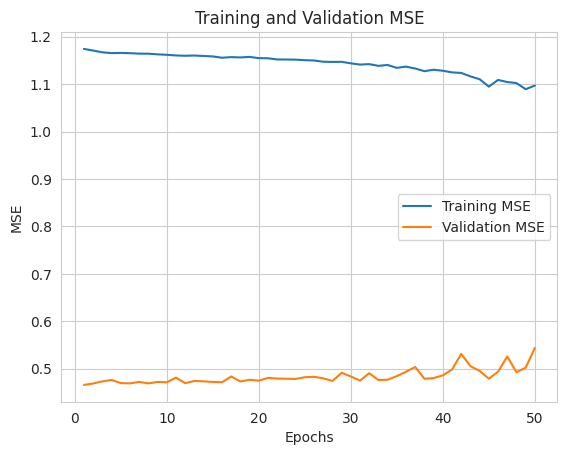

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Create a Sequential model
model = Sequential()

# Add layers to the model
#model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Display model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Plot training and validation loss
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model on train and test data
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate MSE, RMSE, MAE, and R2 score for train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"Train Metrics: MSE = {train_mse}, RMSE = {train_rmse}, MAE = {train_mae}, R2 Score = {train_r2}")
print(f"Test Metrics: MSE = {test_mse}, RMSE = {test_rmse}, MAE = {test_mae}, R2 Score = {test_r2}")


310/310 [==============================] - 0s 1ms/step
Train Metrics: MSE = 0.9617462373813728, RMSE = 0.9806866152759366, MAE = 0.2690983066882809, R2 Score = 0.08044854670663582
Test Metrics: MSE = 0.8894674931871013, RMSE = 0.9431158429308147, MAE = 0.26981540115504227, R2 Score = -0.03147594481308347


ANN Model 2

Epoch 1/25
744/744 - 3s - loss: 1.2366 - mean_squared_error: 1.2366 - val_loss: 0.4740 - val_mean_squared_error: 0.4740 - 3s/epoch - 4ms/step
Epoch 2/25
744/744 - 2s - loss: 1.1780 - mean_squared_error: 1.1780 - val_loss: 0.4727 - val_mean_squared_error: 0.4727 - 2s/epoch - 2ms/step
Epoch 3/25
744/744 - 2s - loss: 1.1792 - mean_squared_error: 1.1792 - val_loss: 0.4670 - val_mean_squared_error: 0.4670 - 2s/epoch - 3ms/step
Epoch 4/25
744/744 - 2s - loss: 1.1754 - mean_squared_error: 1.1754 - val_loss: 0.4665 - val_mean_squared_error: 0.4665 - 2s/epoch - 3ms/step
Epoch 5/25
744/744 - 2s - loss: 1.1724 - mean_squared_error: 1.1724 - val_loss: 0.4672 - val_mean_squared_error: 0.4672 - 2s/epoch - 2ms/step
Epoch 6/25
744/744 - 2s - loss: 1.1732 - mean_squared_error: 1.1732 - val_loss: 0.4686 - val_mean_squared_error: 0.4686 - 2s/epoch - 2ms/step
Epoch 7/25
744/744 - 2s - loss: 1.1746 - mean_squared_error: 1.1746 - val_loss: 0.4718 - val_mean_squared_error: 0.4718 - 2s/epoch - 2ms/step
Epoch 

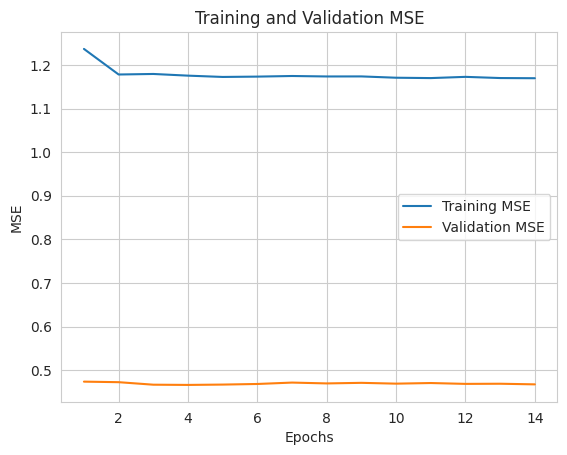

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a Sequential model
model = Sequential()

# Add layers to the model with batch normalization and dropout
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Plot training and validation loss
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model on train and test data
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate MSE, RMSE, MAE, and R2 score for train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"Train Metrics: MSE = {train_mse}, RMSE = {train_rmse}, MAE = {train_mae}, R2 Score = {train_r2}")
print(f"Test Metrics: MSE = {test_mse}, RMSE = {test_rmse}, MAE = {test_mae}, R2 Score = {test_r2}")


310/310 [==============================] - 0s 1ms/step
Train Metrics: MSE = 1.0293960706838718, RMSE = 1.0145915782638213, MAE = 0.27164469608623465, R2 Score = 0.015766720970832204
Test Metrics: MSE = 0.8407237767803328, RMSE = 0.9169099065777034, MAE = 0.26750712500158186, R2 Score = 0.02504997807839693


Results : Linear Regression:
Train MSE: 1.0302132119147664, RMSE: 1.01499419304485, MAE: 0.267847411440932, R2 Score: 0.014985430254831233
Test MSE: 0.8409936318515154, RMSE: 0.9170570493985177, MAE: 0.26228087243391607, R2 Score: 0.024737039138365224

Polynomial Regression:
Train MSE: 1.0245418287246955, RMSE: 1.0121965366097117, MAE: 0.2660697359448069, R2 Score: 0.020407992311130885
Test MSE: 0.8480795990135551, RMSE: 0.9209123731460855, MAE: 0.2643612876094834, R2 Score: 0.016519757754432818

ANN Model 1 :

Train Metrics: MSE = 0.9617462373813728, RMSE = 0.9806866152759366, MAE = 0.2690983066882809, R2 Score = 0.08044854670663582
Test Metrics: MSE = 0.8894674931871013, RMSE = 0.9431158429308147, MAE = 0.26981540115504227, R2 Score = -0.03147594481308347

ANN Model 2 :

Train Metrics: MSE = 1.0293960706838718, RMSE = 1.0145915782638213, MAE = 0.27164469608623465, R2 Score = 0.015766720970832204
Test Metrics: MSE = 0.8407237767803328, RMSE = 0.9169099065777034, MAE = 0.26750712500158186, R2 Score = 0.02504997807839693



Conclusion :
 Among these models, Linear Regression and ANN Model 2 have the lowest RMSE values on the test data, which indicates better predictive performance with lower error. However, the R2 score for Linear Regression is slightly better than ANN Model 2, suggesting that Linear Regression explains the variance in the data better. We could say, perhaps dataset is too simple for ANN to give the best perfomance and hence Linear Regression did better.



## Sales data (Regression):

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Sales_data.csv')
df3.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
print(df3.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [ ]:
df3 = df3.drop(columns=['Postal Code'])

In [ ]:
selected_columns = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Sales']
df3 = df3[selected_columns]
df3.head(5)

,Ship Mode,Segment,Region,Category,Sub-Category,Sales
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600
1,Second Class,Consumer,South,Furniture,Chairs,731.9400
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200
3,Standard Class,Consumer,South,Furniture,Tables,957.5775
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode 'Ship Mode' column
label_encoder = LabelEncoder()
df3['Ship Mode'] = label_encoder.fit_transform(df3['Ship Mode'])

# Identify the columns to one-hot encode
one_hot_cols = ['Segment', 'Region', 'Category', 'Sub-Category']

# Perform one-hot encoding
df3 = pd.get_dummies(df3, columns=one_hot_cols, drop_first=True)

In [ ]:
df3.head(4)

,Ship Mode,Sales,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,2,261.9600,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,731.9400,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,14.6200,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,957.5775,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Separate features and target variable
X = df3.drop(columns=['Sales'])
y = df3['Sales']

# Standard scaling for numeric features
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Standard scaling for the target variable
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred_linear_train = model1.predict(x_train)
y_pred_linear_test = model1.predict(x_test)

mse_train_linear = mean_squared_error(y_train, y_pred_linear_train)
mse_test_linear = mean_squared_error(y_test, y_pred_linear_test)
rmse_train_linear = mean_squared_error(y_train, y_pred_linear_train, squared=False)  # RMSE
rmse_test_linear = mean_squared_error(y_test, y_pred_linear_test, squared=False)  # RMSE
mae_train_linear = mean_absolute_error(y_train, y_pred_linear_train)  # MAE
mae_test_linear = mean_absolute_error(y_test, y_pred_linear_test)  # MAE
r2_train_linear = r2_score(y_train, y_pred_linear_train)
r2_test_linear = r2_score(y_test, y_pred_linear_test)

print("Linear Regression:")
print(f"Train MSE: {mse_train_linear}, RMSE: {rmse_train_linear}, MAE: {mae_train_linear}, R2 Score: {r2_train_linear}")
print(f"Test MSE: {mse_test_linear}, RMSE: {rmse_test_linear}, MAE: {mae_test_linear}, R2 Score: {r2_test_linear}")


Linear Regression:
Train MSE: 0.6316449017141305, RMSE: 0.7947609085216324, MAE: 0.31115803547130255, R2 Score: 0.1914327229518895
Test MSE: 1.329428275939957, RMSE: 1.1530083590069748, MAE: 0.378630567026026, R2 Score: 0.19487504346931617


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model2 = LinearRegression()
model2.fit(x_train_poly, y_train)
y_pred_poly_train = model2.predict(x_train_poly)
y_pred_poly_test = model2.predict(x_test_poly)

mse_train_poly = mean_squared_error(y_train, y_pred_poly_train)
mse_test_poly = mean_squared_error(y_test, y_pred_poly_test)
rmse_train_poly = mean_squared_error(y_train, y_pred_poly_train, squared=False)  # RMSE
rmse_test_poly = mean_squared_error(y_test, y_pred_poly_test, squared=False)  # RMSE
mae_train_poly = mean_absolute_error(y_train, y_pred_poly_train)  # MAE
mae_test_poly = mean_absolute_error(y_test, y_pred_poly_test)  # MAE
r2_train_poly = r2_score(y_train, y_pred_poly_train)
r2_test_poly = r2_score(y_test, y_pred_poly_test)

print("Polynomial Regression:")
print(f"Train MSE: {mse_train_poly}, RMSE: {rmse_train_poly}, MAE: {mae_train_poly}, R2 Score: {r2_train_poly}")
print(f"Test MSE: {mse_test_poly}, RMSE: {rmse_test_poly}, MAE: {mae_test_poly}, R2 Score: {r2_test_poly}")

Polynomial Regression:
Train MSE: 0.6105567946007749, RMSE: 0.7813813375047902, MAE: 0.310675070488926, R2 Score: 0.218427563408089
Test MSE: 1.4219237731021133, RMSE: 1.1924444528371598, MAE: 0.3875210483504184, R2 Score: 0.13885815675212054


ANN Model 1

Epoch 1/20
184/184 - 5s - loss: 1.2941 - mean_squared_error: 1.2941 - val_loss: 0.4104 - val_mean_squared_error: 0.4104 - 5s/epoch - 25ms/step
Epoch 2/20
184/184 - 1s - loss: 0.8865 - mean_squared_error: 0.8865 - val_loss: 0.3889 - val_mean_squared_error: 0.3889 - 710ms/epoch - 4ms/step
Epoch 3/20
184/184 - 1s - loss: 0.8418 - mean_squared_error: 0.8418 - val_loss: 0.3720 - val_mean_squared_error: 0.3720 - 785ms/epoch - 4ms/step
Epoch 4/20
184/184 - 1s - loss: 0.8278 - mean_squared_error: 0.8278 - val_loss: 0.3653 - val_mean_squared_error: 0.3653 - 740ms/epoch - 4ms/step
Epoch 5/20
184/184 - 1s - loss: 0.8010 - mean_squared_error: 0.8010 - val_loss: 0.3592 - val_mean_squared_error: 0.3592 - 709ms/epoch - 4ms/step
Epoch 6/20
184/184 - 1s - loss: 0.7972 - mean_squared_error: 0.7972 - val_loss: 0.3593 - val_mean_squared_error: 0.3593 - 681ms/epoch - 4ms/step
Epoch 7/20
184/184 - 0s - loss: 0.7701 - mean_squared_error: 0.7701 - val_loss: 0.3592 - val_mean_squared_error: 0.3592 - 409ms/epoc

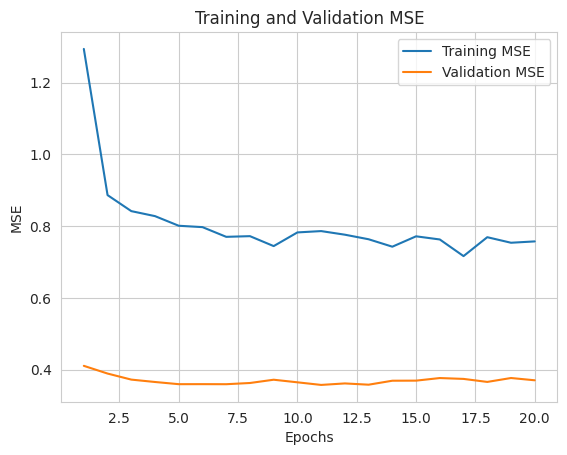

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a Sequential model
model = Sequential()

# Add layers to the model with batch normalization and dropout
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Plot training and validation loss
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model on train and test data
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate MSE, RMSE, MAE, and R2 score for train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"Train Metrics: MSE = {train_mse}, RMSE = {train_rmse}, MAE = {train_mae}, R2 Score = {train_r2}")
print(f"Test Metrics: MSE = {test_mse}, RMSE = {test_rmse}, MAE = {test_mae}, R2 Score = {test_r2}")

77/77 [==============================] - 0s 4ms/step
Train Metrics: MSE = 0.6285718167446112, RMSE = 0.7928252119758876, MAE = 0.33218368135321596, R2 Score = 0.1953665723967255
Test Metrics: MSE = 1.3903268049597035, RMSE = 1.1791212002842217, MAE = 0.40264407650097134, R2 Score = 0.15799383188598382


ANN Model 2

Epoch 1/20
184/184 - 3s - loss: 0.8198 - mean_squared_error: 0.8198 - val_loss: 0.3661 - val_mean_squared_error: 0.3661 - 3s/epoch - 17ms/step
Epoch 2/20
184/184 - 1s - loss: 0.7804 - mean_squared_error: 0.7804 - val_loss: 0.3507 - val_mean_squared_error: 0.3507 - 876ms/epoch - 5ms/step
Epoch 3/20
184/184 - 1s - loss: 0.7609 - mean_squared_error: 0.7609 - val_loss: 0.3522 - val_mean_squared_error: 0.3522 - 1s/epoch - 6ms/step
Epoch 4/20
184/184 - 1s - loss: 0.7434 - mean_squared_error: 0.7434 - val_loss: 0.3519 - val_mean_squared_error: 0.3519 - 734ms/epoch - 4ms/step
Epoch 5/20
184/184 - 0s - loss: 0.7281 - mean_squared_error: 0.7281 - val_loss: 0.3501 - val_mean_squared_error: 0.3501 - 373ms/epoch - 2ms/step
Epoch 6/20
184/184 - 0s - loss: 0.7193 - mean_squared_error: 0.7193 - val_loss: 0.3502 - val_mean_squared_error: 0.3502 - 366ms/epoch - 2ms/step
Epoch 7/20
184/184 - 0s - loss: 0.7051 - mean_squared_error: 0.7051 - val_loss: 0.3538 - val_mean_squared_error: 0.3538 - 379ms/epoch -

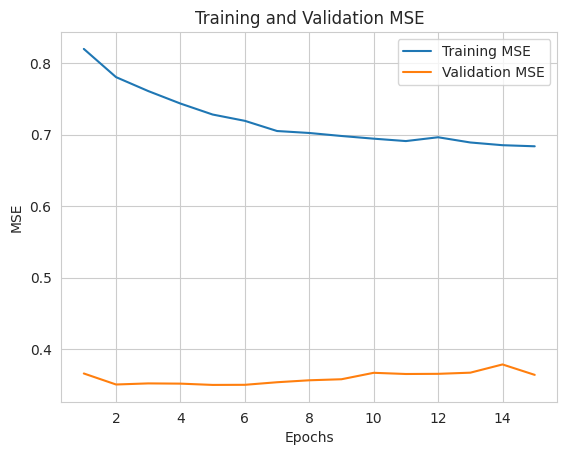

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a Sequential model
model = Sequential()

# Add layers to the model with batch normalization and dropout
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Plot training and validation loss
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']
epochs = range(1, len(mse) + 1)

plt.plot(epochs, mse, label='Training MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model on train and test data
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

# Calculate MSE, RMSE, MAE, and R2 score for train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"Train Metrics: MSE = {train_mse}, RMSE = {train_rmse}, MAE = {train_mae}, R2 Score = {train_r2}")
print(f"Test Metrics: MSE = {test_mse}, RMSE = {test_rmse}, MAE = {test_mae}, R2 Score = {test_r2}")

77/77 [==============================] - 0s 1ms/step
Train Metrics: MSE = 0.6408312835541798, RMSE = 0.8005193836217708, MAE = 0.3134847546302683, R2 Score = 0.17967325536151446
Test Metrics: MSE = 1.3956655287332345, RMSE = 1.1813828882852648, MAE = 0.3881471558112848, R2 Score = 0.15476060763170496


Results :

Linear Regression:
Train MSE: 0.6316449017141305, RMSE: 0.7947609085216324, MAE: 0.31115803547130255, R2 Score: 0.1914327229518895
Test MSE: 1.329428275939957, RMSE: 1.1530083590069748, MAE: 0.378630567026026, R2 Score: 0.19487504346931617

Polynomial Regression:
Train MSE: 0.6105567946007749, RMSE: 0.7813813375047902, MAE: 0.310675070488926, R2 Score: 0.218427563408089
Test MSE: 1.4219237731021133, RMSE: 1.1924444528371598, MAE: 0.3875210483504184, R2 Score: 0.13885815675212054

ANN Model :

Train Metrics: MSE = 0.6285718167446112, RMSE = 0.7928252119758876, MAE = 0.33218368135321596, R2 Score = 0.1953665723967255
Test Metrics: MSE = 1.3903268049597035, RMSE = 1.1791212002842217, MAE = 0.40264407650097134, R2 Score = 0.15799383188598382


ANN Model 2 :

Train Metrics: MSE = 0.6408312835541798, RMSE = 0.8005193836217708, MAE = 0.3134847546302683, R2 Score = 0.17967325536151446
Test Metrics: MSE = 1.3956655287332345, RMSE = 1.1813828882852648, MAE = 0.3881471558112848, R2 Score = 0.15476060763170496

Conclusion :

From the results, we can conclude that Linear Regression and the ANN models perform quite similarly, with the Polynomial Regression slightly lagging behind in terms of R2 score. ANN models are better suited for the task, likely due to their capacity to learn complex patterns and relationships in the data.